In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

In [2]:
df = pd.read_csv('../results/results_local.tsv', sep='\t', na_values='None')#, names=['interface', 'model', 'test', 'run', 'value', 'time'])

In [3]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}

In [4]:
lp_sizes = {x: len(models[x].reactions) for x in models}
milp_sizes = {x: len(models[x].get_exchange_reactions()) for x in models}

In [5]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin-or',

}

In [6]:
df['size_lp'] = df['model'].apply(lambda x: lp_sizes[x])
df['size_milp'] = df['model'].apply(lambda x: milp_sizes[x])
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

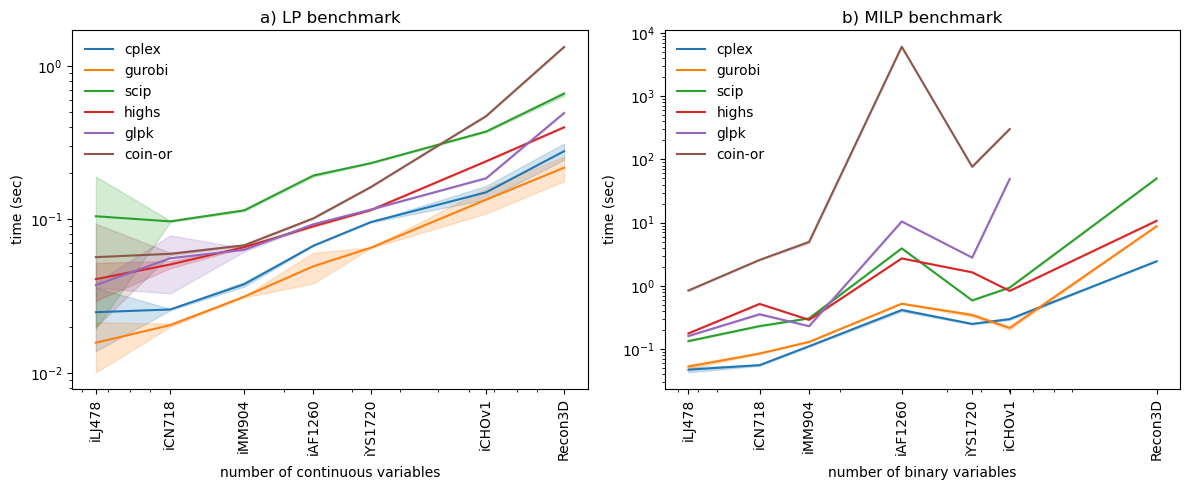

In [111]:
f, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df.dropna().query('test == "LP"'), x="size_lp", y="time", hue="solver", errorbar='sd', ax=axs[0])
sns.lineplot(data=df.dropna().query('test == "MILP"'), x="size_milp", y="time", hue="solver", errorbar='sd', ax=axs[1])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[0].set_xticks(list(lp_sizes.values()))
axs[0].set_xticklabels(list(lp_sizes.keys()), rotation=90)
axs[0].set_xlabel('number of continuous variables')
axs[0].set_ylabel('time (sec)')
axs[0].legend(loc=2, frameon=False)
axs[0].set_title('a) LP benchmark')



axs[1].set_xticks(list(milp_sizes.values()))
axs[1].set_xticklabels(list(milp_sizes.keys()), rotation=90)
axs[1].set_xlabel('number of binary variables')
axs[1].set_ylabel('time (sec)')
axs[1].legend(loc=2, frameon=False)
axs[1].set_title('b) MILP benchmark')


f.tight_layout()
f.savefig('results.png', dpi=300)

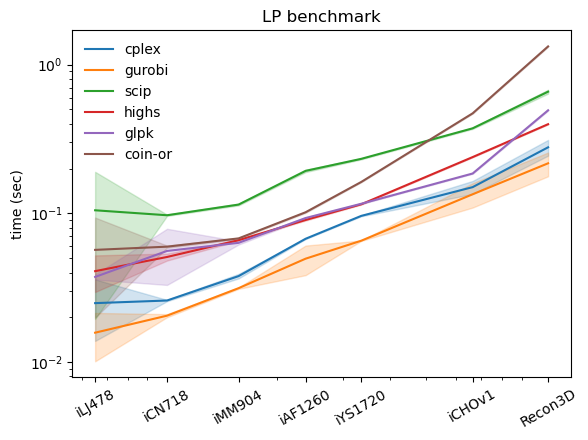

In [17]:
f, ax = plt.subplots(1, 1, figsize=(6, 4.5))

sns.lineplot(data=df.dropna().query('test == "LP"'), x="size_lp", y="time", hue="solver", errorbar='sd', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(list(lp_sizes.values()))
ax.set_xticklabels(list(lp_sizes.keys()), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('time (sec)')
ax.legend(loc=2, frameon=False)
ax.set_title('LP benchmark')

f.tight_layout()
f.savefig('results_lp.png', dpi=300)

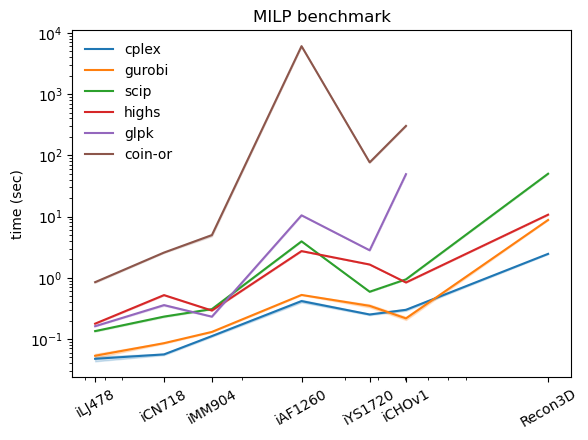

In [19]:
f, ax = plt.subplots(1, 1, figsize=(6, 4.5))

sns.lineplot(data=df.dropna().query('test == "MILP"'), x="size_milp", y="time", hue="solver", errorbar='sd', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(list(milp_sizes.values()))
ax.set_xticklabels(list(milp_sizes.keys()), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('time (sec)')
ax.legend(loc=2, frameon=False)
ax.set_title('MILP benchmark')

f.tight_layout()
f.savefig('results_milp.png', dpi=300)